In [1]:
# -*- coding:cp949 -*-

import os
import numpy as np
import struct
from sklearn.model_selection import train_test_split
from keras import models
from keras import layers
from keras.utils.np_utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [2]:
def getrgb888(r, g, b):
    i = 1
    if r >= g and r >= b:
        i = r / 255 + 1
    elif g >= r and g >= b:
        i = g / 255 + 1
    elif b >= g and b >= r:
        i = b / 255 + 1

    if i != 0:
        r_ = r / i
        g_ = g / i
        b_ = b / i
    else:
        r_ = r
        g_ = g
        b_ = b

    if r_ > 30:
        r_ = r_ - 30
    if g_ > 30:
        g_ = g_ - 30
    if b > 30:
        b_ = b_ - 30

    r_ = r_ * 255 / 225
    g_ = g_ * 255 / 225
    b_ = b_ * 255 / 225

    if r_ > 255:
        r_ = 255
    if g_ > 255:
        g_ = 255
    if b_ > 255:
        b_ = 255

    rgblist = [np.uint8(r_), np.uint8(g_), np.uint8(b_)]
    return rgblist
#raw값을 rgb값으로 변환

In [3]:
curr_path = 'C:/Users/jiyoo/Documents/code/binfiles'
txt_path = os.path.join(os.path.abspath(os.getcwd()), 'tmp_filelist.txt')

dataX, dataY = [], []

with open(txt_path, 'wt') as f:
    for root, dirs, files in os.walk(curr_path):
        if files:
            for file in files:
                if file.find('.bin') > 0:
                    filename = os.path.join(root, file)
                    f.write(filename + '\n')

with open(txt_path, 'r') as file:
    lines = file.readlines()
    lines.sort()
    j = 0;
    for line in lines:
        bfname = ''.join([os.path.splitext(line)[0], '.bin'])
        with open(bfname, 'rb') as BF:
            while True:
                temp = BF.read(1)  # 0x02 (Start of File)
                if not temp: break
                m_AcX = np.int16(0x0000 | int(struct.unpack('B', BF.read(1))[0]) |
                                 (int(struct.unpack('B', BF.read(1))[0]) << 8))
                m_AcY = np.int16(0x0000 | int(struct.unpack('B', BF.read(1))[0]) |
                                 (int(struct.unpack('B', BF.read(1))[0]) << 8))
                m_AcZ = np.int16(0x0000 | int(struct.unpack('B', BF.read(1))[0]) |
                                 (int(struct.unpack('B', BF.read(1))[0]) << 8))
                tmp = np.int16(0x0000 | int(struct.unpack('B', BF.read(1))[0]) |
                                 (int(struct.unpack('B', BF.read(1))[0]) << 8))
                m_GyX = np.int16(0x0000 | int(struct.unpack('B', BF.read(1))[0]) |
                                 (int(struct.unpack('B', BF.read(1))[0]) << 8))
                m_GyY = np.int16(0x0000 | int(struct.unpack('B', BF.read(1))[0]) |
                                 (int(struct.unpack('B', BF.read(1))[0]) << 8))
                m_GyZ = np.int16(0x0000 | int(struct.unpack('B', BF.read(1))[0]) |
                                 (int(struct.unpack('B', BF.read(1))[0]) << 8))
                c_C = np.uint16(0x0000 | int(struct.unpack('B', BF.read(1))[0]) |
                                 (int(struct.unpack('B', BF.read(1))[0]) << 8))
                c_R = np.uint16(0x0000 | int(struct.unpack('B', BF.read(1))[0]) |
                                 (int(struct.unpack('B', BF.read(1))[0]) << 8))
                c_G = np.uint16(0x0000 | int(struct.unpack('B', BF.read(1))[0]) |
                                 (int(struct.unpack('B', BF.read(1))[0]) << 8))
                c_B = np.uint16(0x0000 | int(struct.unpack('B', BF.read(1))[0]) |
                                 (int(struct.unpack('B', BF.read(1))[0]) << 8))
                PPM = np.int(0x0000 | int(struct.unpack('B', BF.read(1))[0]) |
                               (int(struct.unpack('B', BF.read(1))[0]) << 8) |
                               (int(struct.unpack('B', BF.read(1))[0]) << 16) |
                               (int(struct.unpack('B', BF.read(1))[0]) << 24))

                rgb = getrgb888(c_R, c_G, c_B)
                dataX.append(rgb)
                dataY.append(os.path.splitext(os.path.basename(line))[0])
                temp = BF.read(1)  # 0x03 (End of File)
        j += 1

dataX = np.array(dataX)

t = Tokenizer()
t.fit_on_texts(dataY)
dataY_=t.texts_to_sequences(dataY)
dataY = to_categorical(dataY_)
#카테고리에 대한 one-hot encoding

x_train, x_test, y_train, y_test = train_test_split(dataX, dataY, test_size=0.2, shuffle=True, stratify=dataY, random_state=34)

print(np.shape(x_train))
print(np.shape(x_test))
print(np.shape(y_train))
print(np.shape(y_test))

(933, 3)
(234, 3)
(933, 29)
(234, 29)


In [5]:
model = models.Sequential()
model.add(layers.Dense(64, input_dim=3, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(j + 1, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )

hist = model.fit(x_train,
                y_train,
                epochs=500,
                batch_size=32
                )



Epoch 1/500
933/933 [==============================] - 0s 326us/step - loss: 13.0513 - accuracy: 0.0675
Epoch 2/500
933/933 [==============================] - 0s 49us/step - loss: 3.3606 - accuracy: 0.1265
Epoch 3/500
933/933 [==============================] - 0s 46us/step - loss: 2.9704 - accuracy: 0.1651
Epoch 4/500
933/933 [==============================] - 0s 50us/step - loss: 2.8172 - accuracy: 0.2090
Epoch 5/500
933/933 [==============================] - 0s 50us/step - loss: 2.6361 - accuracy: 0.2551
Epoch 6/500
933/933 [==============================] - 0s 60us/step - loss: 2.5365 - accuracy: 0.2840
Epoch 7/500
933/933 [==============================] - 0s 57us/step - loss: 2.4275 - accuracy: 0.3119
Epoch 8/500
933/933 [==============================] - 0s 52us/step - loss: 2.3409 - accuracy: 0.3269
Epoch 9/500
933/933 [==============================] - 0s 52us/step - loss: 2.2859 - accuracy: 0.3526
Epoch 10/500
933/933 [==============================] - 0s 64us/step - loss: 2.1

933/933 [==============================] - 0s 96us/step - loss: 0.4867 - accuracy: 0.8167
Epoch 81/500
933/933 [==============================] - 0s 48us/step - loss: 0.4851 - accuracy: 0.8189
Epoch 82/500
933/933 [==============================] - 0s 61us/step - loss: 0.5229 - accuracy: 0.7878
Epoch 83/500
933/933 [==============================] - 0s 61us/step - loss: 0.4164 - accuracy: 0.8414
Epoch 84/500
933/933 [==============================] - 0s 66us/step - loss: 0.5119 - accuracy: 0.8081
Epoch 85/500
933/933 [==============================] - 0s 61us/step - loss: 0.4325 - accuracy: 0.8221
Epoch 86/500
933/933 [==============================] - 0s 58us/step - loss: 0.4249 - accuracy: 0.8285
Epoch 87/500
933/933 [==============================] - 0s 53us/step - loss: 0.4655 - accuracy: 0.8221
Epoch 88/500
933/933 [==============================] - 0s 55us/step - loss: 0.4487 - accuracy: 0.8339
Epoch 89/500
933/933 [==============================] - 0s 69us/step - loss: 0.4944 - 

933/933 [==============================] - 0s 73us/step - loss: 0.3843 - accuracy: 0.8521
Epoch 159/500
933/933 [==============================] - 0s 76us/step - loss: 0.3114 - accuracy: 0.8896
Epoch 160/500
933/933 [==============================] - 0s 164us/step - loss: 0.3460 - accuracy: 0.8757
Epoch 161/500
933/933 [==============================] - 0s 110us/step - loss: 0.3639 - accuracy: 0.8767
Epoch 162/500
933/933 [==============================] - 0s 64us/step - loss: 0.2973 - accuracy: 0.8907
Epoch 163/500
933/933 [==============================] - 0s 69us/step - loss: 0.3111 - accuracy: 0.8789
Epoch 164/500
933/933 [==============================] - 0s 60us/step - loss: 0.3598 - accuracy: 0.8714
Epoch 165/500
933/933 [==============================] - 0s 78us/step - loss: 0.3297 - accuracy: 0.8767
Epoch 166/500
933/933 [==============================] - 0s 72us/step - loss: 0.3447 - accuracy: 0.8746
Epoch 167/500
933/933 [==============================] - 0s 77us/step - loss

933/933 [==============================] - 0s 79us/step - loss: 0.2694 - accuracy: 0.8950
Epoch 237/500
933/933 [==============================] - 0s 82us/step - loss: 0.2501 - accuracy: 0.9046
Epoch 238/500
933/933 [==============================] - 0s 77us/step - loss: 0.3526 - accuracy: 0.8800
Epoch 239/500
933/933 [==============================] - 0s 67us/step - loss: 0.2269 - accuracy: 0.9164
Epoch 240/500
933/933 [==============================] - 0s 104us/step - loss: 0.2834 - accuracy: 0.8885
Epoch 241/500
933/933 [==============================] - 0s 161us/step - loss: 0.3218 - accuracy: 0.8992
Epoch 242/500
933/933 [==============================] - 0s 109us/step - loss: 0.2717 - accuracy: 0.9014
Epoch 243/500
933/933 [==============================] - 0s 75us/step - loss: 0.2909 - accuracy: 0.8939
Epoch 244/500
933/933 [==============================] - 0s 83us/step - loss: 0.2645 - accuracy: 0.8982
Epoch 245/500
933/933 [==============================] - 0s 93us/step - los

933/933 [==============================] - 0s 91us/step - loss: 0.2445 - accuracy: 0.9271
Epoch 314/500
933/933 [==============================] - 0s 106us/step - loss: 0.2775 - accuracy: 0.9089
Epoch 315/500
933/933 [==============================] - 0s 265us/step - loss: 0.2322 - accuracy: 0.9185
Epoch 316/500
933/933 [==============================] - 0s 108us/step - loss: 0.2934 - accuracy: 0.8800
Epoch 317/500
933/933 [==============================] - 0s 99us/step - loss: 0.3030 - accuracy: 0.8992
Epoch 318/500
933/933 [==============================] - 0s 95us/step - loss: 0.2057 - accuracy: 0.9175
Epoch 319/500
933/933 [==============================] - 0s 94us/step - loss: 0.2350 - accuracy: 0.9153
Epoch 320/500
933/933 [==============================] - 0s 105us/step - loss: 0.2475 - accuracy: 0.9046
Epoch 321/500
933/933 [==============================] - 0s 112us/step - loss: 0.2635 - accuracy: 0.9003
Epoch 322/500
933/933 [==============================] - 0s 88us/step - l

Epoch 391/500
933/933 [==============================] - 0s 59us/step - loss: 0.1964 - accuracy: 0.9260
Epoch 392/500
933/933 [==============================] - 0s 67us/step - loss: 0.2732 - accuracy: 0.8928
Epoch 393/500
933/933 [==============================] - 0s 69us/step - loss: 0.1879 - accuracy: 0.9185
Epoch 394/500
933/933 [==============================] - 0s 66us/step - loss: 0.2610 - accuracy: 0.9046
Epoch 395/500
933/933 [==============================] - 0s 68us/step - loss: 0.2352 - accuracy: 0.9078
Epoch 396/500
933/933 [==============================] - 0s 97us/step - loss: 0.2102 - accuracy: 0.9185
Epoch 397/500
933/933 [==============================] - 0s 78us/step - loss: 0.2254 - accuracy: 0.9293
Epoch 398/500
933/933 [==============================] - 0s 77us/step - loss: 0.2635 - accuracy: 0.9153
Epoch 399/500
933/933 [==============================] - 0s 88us/step - loss: 0.2201 - accuracy: 0.9239
Epoch 400/500
933/933 [==============================] - 0s 64us

933/933 [==============================] - 0s 68us/step - loss: 0.2254 - accuracy: 0.9250
Epoch 469/500
933/933 [==============================] - 0s 63us/step - loss: 0.2182 - accuracy: 0.9282
Epoch 470/500
933/933 [==============================] - 0s 78us/step - loss: 0.2268 - accuracy: 0.9239
Epoch 471/500
933/933 [==============================] - 0s 76us/step - loss: 0.2192 - accuracy: 0.9175
Epoch 472/500
933/933 [==============================] - 0s 101us/step - loss: 0.2583 - accuracy: 0.9185
Epoch 473/500
933/933 [==============================] - 0s 128us/step - loss: 0.2033 - accuracy: 0.9121
Epoch 474/500
933/933 [==============================] - 0s 153us/step - loss: 0.2261 - accuracy: 0.9228
Epoch 475/500
933/933 [==============================] - 0s 90us/step - loss: 0.2712 - accuracy: 0.8992
Epoch 476/500
933/933 [==============================] - 0s 97us/step - loss: 0.1932 - accuracy: 0.9282
Epoch 477/500
933/933 [==============================] - 0s 90us/step - los

In [6]:
model.evaluate(x_test, y_test, batch_size=32)
result = model.predict(x_test, batch_size=32)
print(result.shape)


234/234 [==============================] - 0s 132us/step
(234, 29)


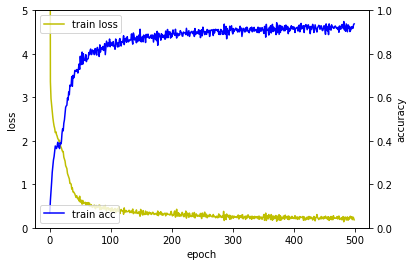

In [9]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.set_ylim([0.0, 5.0])
acc_ax.set_ylim([0.0, 1.0])
print(hist)

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

model.save("C:/Users/jiyoo/Documents/code/python/model/model.h5")